### Step 1: Importing necessary libraries

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.preprocessing import LabelEncoder
from    scipy.stats             import  ttest_ind, f_oneway
from    statsmodels.stats.proportion import proportions_ztest
import  matplotlib.pyplot       as      plt

### Step 2: Importing data as a dataframe

In [250]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 3a: Shape of the data

In [251]:
print('Shape of insurance data:', insurance_data.shape, '\n')

Shape of insurance data: (1338, 7) 



### Step 3b: Data type of each attribute

In [252]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Step 3c: Checking the presence of missing values

In [253]:
if insurance_data.isna().sum().sum() == 0:
    print('There are no missing values!')
else:
    insurance_data.fillna(insurance_data.median())

There are no missing values!


### Step 3d: 5 point summary of numerical attributes

In [254]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Step 3e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

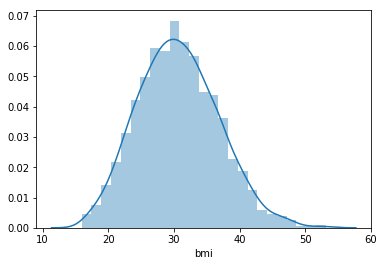

In [255]:
sns.distplot(insurance_data.bmi)

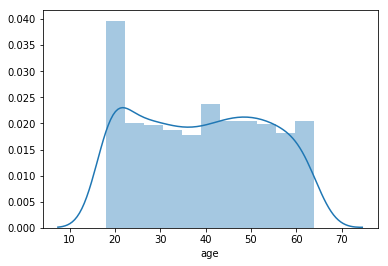

In [256]:
sns.distplot(insurance_data.age)

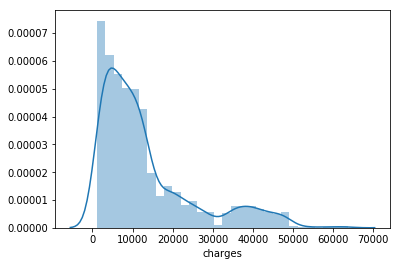

In [257]:
sns.distplot(insurance_data.charges)

### Step 3f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [258]:
print('Skewness of bmi:',skew(insurance_data.bmi))

Skewness of bmi: 0.28372857291709386


In [259]:
print('Skewness of age:',skew(insurance_data.age))

Skewness of age: 0.055610083072599126


In [260]:
print('Skewness of charges:',skew(insurance_data.charges))

Skewness of charges: 1.5141797118745743


### Step 3g: Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

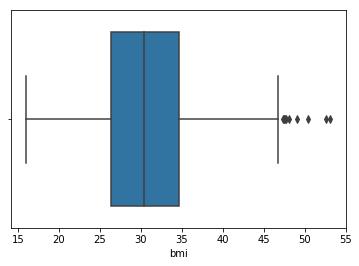

In [261]:
sns.boxplot(insurance_data.bmi)

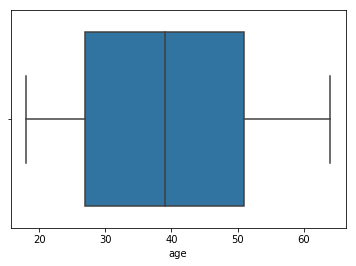

In [262]:
sns.boxplot(insurance_data.age)

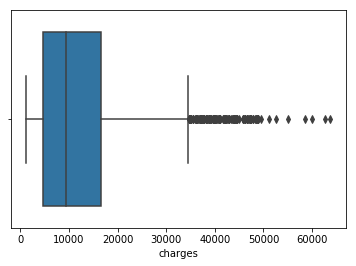

In [263]:
sns.boxplot(insurance_data.charges)

In [264]:
def detect_outliers(data):
    '''Detecting outliers using IQR method
    '''
    outliers = []
    sorted(data)
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    for y in data:
        if (y < lower_bound) or (y > upper_bound):
            outliers.append(y)
    return outliers

In [265]:
print('bmi outliers:', sorted(detect_outliers(insurance_data.bmi)))
print('age outliers:', sorted(detect_outliers(insurance_data.age)))
print('charges outliers:', sorted(detect_outliers(insurance_data.charges)))

bmi outliers: [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]
age outliers: []
charges outliers: [34617.84065, 34672.1472, 34779.615, 34806.4677, 34828.654, 34838.873, 35069.37452, 35147.52848, 35160.13457, 35491.64, 35585.576, 35595.5898, 36021.0112, 36085.219, 36124.5737, 36149.4835, 36189.1017, 36197.699, 36219.40545, 36307.7983, 36397.576, 36580.28216, 36837.467000000004, 36898.73308, 36910.60803, 36950.2567, 37079.372, 37133.8982, 37165.1638, 37270.1512, 37465.34375, 37484.4493, 37607.5277, 37701.8768, 37742.5757, 37829.7242, 38126.2465, 38245.59327, 38282.7495, 38344.566, 38415.474, 38511.6283, 38709.176, 38711.0, 38746.3551, 38792.6856, 38998.546, 39047.285, 39125.33225, 39241.442, 39556.4945, 39597.4072, 39611.7577, 39722.7462, 39725.51805, 39727.614, 39774.2763, 39836.519, 39871.7043, 39983.42595, 40003.33225, 40103.89, 40182.246, 40273.6455, 40419.0191, 40720.55105, 40904.1995, 40932.4295, 40941.2854, 40974.1649, 41034.2214, 41097.16175, 41661.602, 41676.0811, 

In [266]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 3h: Distribution of categorical columns

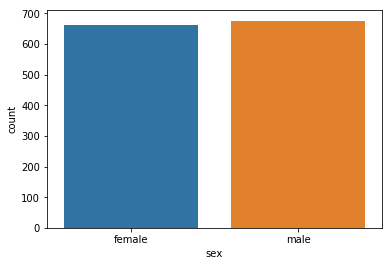

In [267]:
sns.countplot(insurance_data.sex)

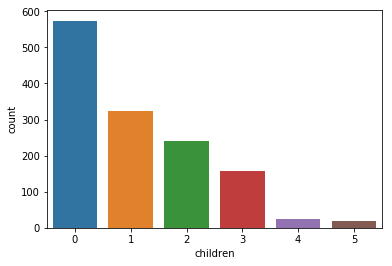

In [268]:
sns.countplot(insurance_data.children)

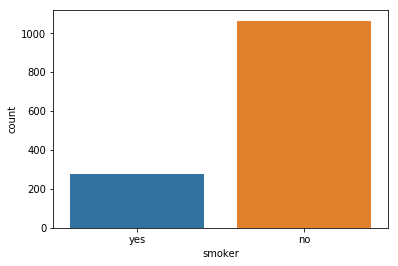

In [269]:
sns.countplot(insurance_data.smoker)

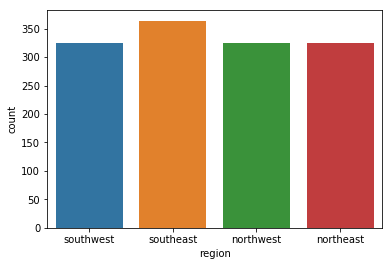

In [270]:
sns.countplot(insurance_data.region)

### Step 3i: Pair plot that includes all the columns of the data frame

In [271]:
# Converting categorical variables to numeric
le = LabelEncoder()
insurance_data['gender_code'] = le.fit_transform(insurance_data['sex'])
gender_code_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Genders:',gender_code_mapping)

insurance_data['smoker_code'] = le.fit_transform(insurance_data['smoker'])
smoker_code_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Smoking:',smoker_code_mapping)

insurance_data['region_code'] = le.fit_transform(insurance_data['region'])
region_code_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Region:',region_code_mapping)


Genders: {'female': 0, 'male': 1}
Smoking: {'no': 0, 'yes': 1}
Region: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


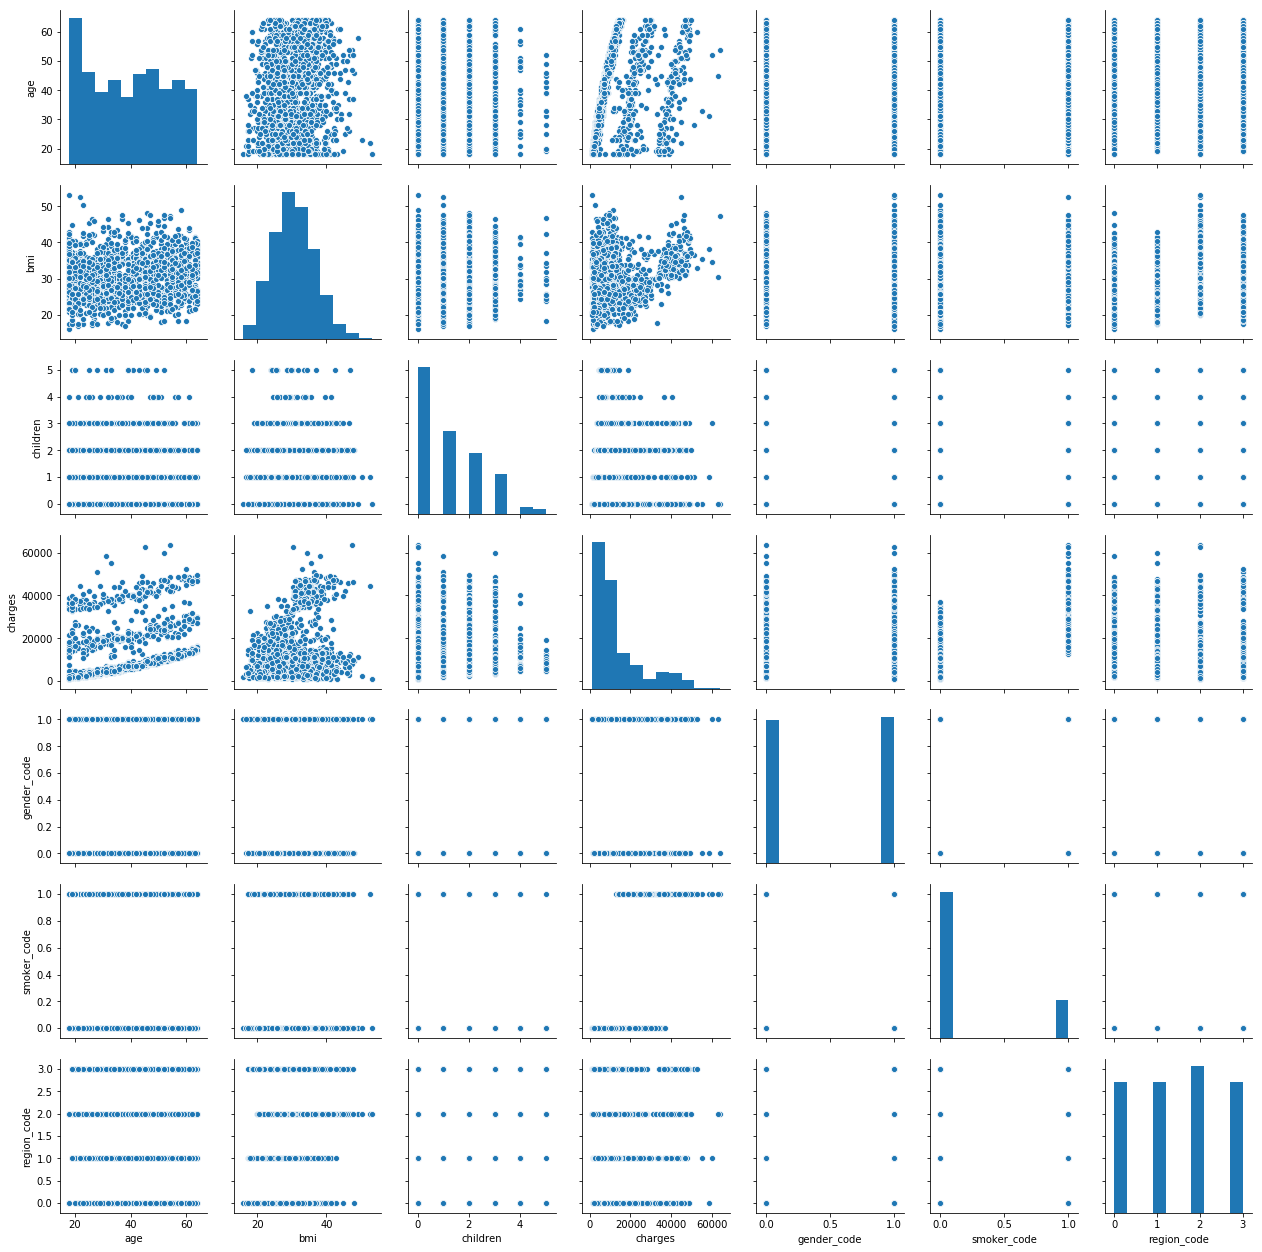

In [272]:
sns.pairplot(insurance_data)

### 4a: Do charges of people who smoke differ significantly from the people who don't?

#### Step I: Deciding which test to use

We will use Hypothesis Testing to answer this question. Also, as we have to compare charges of two independent samples and **because the population mean for distribution of charges is unknown**, we will use a 2 sample independent **t test** to arrive at a conclusion. 

#### Step II: Deciding null and alternative hypothesis

Our 'Null Hypothesis ($H_0$)' is that the charges don't differ significantly for people who smoke from people who don't. Whereas, our 'Alternate Hypothesis ($H_A$)' is that the charges differ significantly.

* Let $\mu_S$ be the mean of charges of smokers.
* Let $\mu_{NS}$ be the mean of charges of non-smokers.

* $H_0$: $\mu_{S} - \mu_{NS} = 0 $
* $H_A$: $\mu_{S} - \mu_{NS} \neq 0$ 

#### Step III: Deciding the significance level

We will use a significance level ($\alpha$) of 5 percent.

* $\alpha = 0.05$

In [273]:
alpha = 0.05

#### Step IV: Calculating the p - value and test statistic, and python code for the same

* We use the scipy.stats.ttest_ind to calculate the t-test for the means of two independent samples of charges (that are calculated below). This function returns the t statistic and the two-tailed p value.

* This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) charges. This test assumes that the populations have identical variances.

In [274]:
# Getting arrays for charges of smokers and non-smokers
smoker_charges = (insurance_data.loc[insurance_data['smoker'] == 'yes','charges']).to_numpy()
non_smoker_charges = (insurance_data.loc[insurance_data['smoker'] == 'no','charges']).to_numpy()

In [275]:
#Checking mean for smokers and non-smokers
print('Smoker Charges Mean:',np.mean(smoker_charges))
print('Non-smoker Charges Mean:',np.mean(non_smoker_charges))

Smoker Charges Mean: 32050.23183153284
Non-smoker Charges Mean: 8434.268297856204


In [276]:
#Calculating p_value
t_statistic, p_value  =  stats.ttest_ind(smoker_charges,non_smoker_charges)
print('p-value:',p_value) 

p-value: 8.271435842177219e-283


#### Step V: Deciding or Failing to reject Null Hypothesis

In [277]:
if p_value < alpha:
    print('Reject Null')
else:
    print('Fail to Reject Null') 

Reject Null


As the p-value is way below 5 percent $ (8.271 \times 10^{-281} \%) $, the statsitical decision is to **reject the null hypothesis** and accept the alternate hypothesis that the **charges of smokers and non-smokers differ significantly**

### 4b: Does bmi of males differ significantly from that of females?

#### Step I: Deciding which test to use

We will use Hypothesis Testing to answer this question. Also, as we have to compare charges of two independent samples and **because the population mean for distribution of bmi is unknown**, we will use a 2 sample independent **t test** to arrive at a conclusion. 

#### Step II: Deciding null and alternative hypothesis

Our 'Null Hypothesis ($H_0$)' is that the bmi doesn't differ significantly for males and females. Whereas, our 'Alternate Hypothesis ($H_A$)' is that the bmi differs significantly.

* Let $\mu_M$ be the mean of bmis of males.
* Let $\mu_F$ be the mean of bmis of females.

* $H_0$: $\mu_{M} - \mu_{F} = 0 $
* $H_A$: $\mu_{M} - \mu_{F} \neq 0$ 

#### Step III: Deciding the significance level

We will use a significance level ($\alpha$) of 5 percent.

* $\alpha = 0.05$

In [278]:
alpha = 0.05

#### Step IV: Calculating the p - value and test statistic, and python code for the same

* We use the scipy.stats.ttest_ind to calculate the t-test for the means of two independent samples of bmis (that are calculated below). This function returns the t statistic and the two-tailed p value.

* This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) bmis. This test assumes that the populations have identical variances.

In [279]:
# Getting arrays for bmis of males and females
male_bmis = (insurance_data.loc[insurance_data['sex'] == 'male','bmi']).to_numpy()
female_bmis = (insurance_data.loc[insurance_data['sex'] == 'female','bmi']).to_numpy()

In [280]:
#Checking mean for males and females
print('Male bmis Mean:',np.mean(male_bmis))
print('Female bmis Mean:',np.mean(female_bmis))

Male bmis Mean: 30.943128698224854
Female bmis Mean: 30.37774924471299


In [281]:
#Calculating p_value
t_statistic, p_value  =  stats.ttest_ind(male_bmis,female_bmis)
print('p-value:',p_value) 

p-value: 0.08997637178984932


#### Step V: Deciding or Failing to reject Null Hypothesis

In [282]:
if p_value < alpha:
    print('Reject Null')
else:
    print('Fail to Reject Null') 

Fail to Reject Null


As the p-value is above 5 percent $ (8.998 \%) $, the statsitical decision is that we **fail to reject the null hypothesis** and accept the null hypothesis that the **bmis of males and females don't differ significantly** at a 5 percent level of significance.

### 4c: Is the proportion of smokers significantly different in different genders?

#### Step I: Deciding which test to use

As we have the following constraints/conditions:

* we have to compare proportions of two samples
* the samples are independent
* each sample includes at least 10 successes and 10 failures,

we will use a **two-proportion z-test** to arrive at a conclusion. 
(Theory used: https://stattrek.com/hypothesis-test/difference-in-proportions.aspx)

#### Step II: Deciding null and alternative hypothesis

Our 'Null Hypothesis ($H_0$)' is that the proportions of smokers in males is same as the proportion of smokers in females. Whereas, our 'Alternate Hypothesis ($H_A$)' is that the proportion of smokers differs significantly in males and females.

* Let $p_1$ be the proportion of smokers in males.
* Let $p_2$ be the proportion of smokers in females.

* $H_0$: $p_1 - p_2 = 0 $
* $H_A$: $p_1 - p_2 \neq 0$ 

#### Step III: Deciding the significance level

We will use a significance level ($\alpha$) of 5 percent.

* $\alpha = 0.05$

In [283]:
alpha = 0.05

#### Step IV: Calculating the p - value and test statistic, and python code for the same


* We use the statsmodels.stats.proportion.proportions_ztest to calculate the z-test for the means of two independent samples of proportions (that are calculated below). This function returns the z statistic and the two-tailed p value.

* This is a two-sided test for the null hypothesis that two independent samples have identical average (expected) proportions.

In [284]:
#Counting the number of males and females
males_count = pd.value_counts(insurance_data['sex'])['male']
females_count = pd.value_counts(insurance_data['sex'])['female']

#Counting the number of successes (male smokers and female_smokers)
male_smokers_count= len(np.where((insurance_data['smoker'] == 'yes') & (insurance_data['sex'] == 'male'))[0])
female_smokers_count= len(np.where((insurance_data['smoker'] == 'yes') & (insurance_data['sex'] == 'female'))[0])

print('Proportion of smokers in males:',male_smokers_count/males_count)
print('Proportion of smokers in females:',female_smokers_count/females_count)

Proportion of smokers in males: 0.23520710059171598
Proportion of smokers in females: 0.17371601208459214


In [285]:
z_stat, p_value = proportions_ztest([male_smokers_count,female_smokers_count],[males_count,females_count])
print('p-value:',p_value)

p-value: 0.005324114164320532


#### Step V: Deciding or Failing to reject Null Hypothesis

In [286]:
if p_value < alpha:
    print('Reject Null')
else:
    print('Fail to Reject Null') 

Reject Null


As the p-value is much below 5 percent $ (0.5324 \%) $, the statsitical decision is to **reject the null hypothesis** and accept the alternate hypothesis that the **proportions of smokers differ significantly in different genders**

### 4d:  Is the distribution of bmi across women with no children, one child and two children, the same ?

#### Step I: Deciding which test to use

Because, we want to compare mean of populations of **more than two groups**, we will use ANOVA to arrive at a conclusion.

Also, the following assumptions are satisfied before using ANOVA:

* The samples are independent - the bmis samples are all indpendent
* Each sample is from a normally distributed population - we are assuming that the bmi populations are all normally distributed
* The population standard deviations of the groups are all equal - we are assuming the variances of all bmi populations are equal

#### Step II: Deciding null and alternative hypothesis

Our 'Null Hypothesis ($H_0$)' is that the bmis don't differ significantly for women with no children, one child and two children. Whereas, our 'Alternate Hypothesis ($H_A$)' is that at least one of the bmis differs significantly from the other two groups of bmis.

* Let $\mu_1$ be the mean bmi of women with no children.
* Let $\mu_2$ be the mean bmi of women with one child.
* Let $\mu_3$ be the mean bmi of women with two children.

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

#### Step III: Deciding the significance level

We will use a significance level ($\alpha$) of 5 percent.

* $\alpha = 0.05$

In [287]:
alpha = 0.05

#### Step IV: Calculating the p - value and test statistic, and python code for the same

We use the scipy.stats.f_oneway to calculate the f-test for the means of three independent samples of bmis (that are calculated below). This function returns the f-value and the associated p-value from the f-distribution.

Mean of bmis for women with 0 children: 30.361522491349486
Mean of bmis for women with 1 child: 30.05265822784811
Mean of bmis for women with 2 children: 30.64978991596637


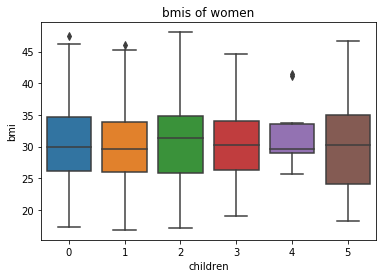

In [288]:
#Getting bmis for women with zero, one and two children
women_0ch_bmis = insurance_data.loc[((insurance_data.children == 0) & (insurance_data.sex == 'female')),'bmi']
women_1ch_bmis = insurance_data.loc[((insurance_data.children == 1) & (insurance_data.sex == 'female')),'bmi']
women_2ch_bmis = insurance_data.loc[((insurance_data.children == 2) & (insurance_data.sex == 'female')),'bmi']

#Means of bmis for women with zero, one and two children
print('Mean of bmis for women with 0 children:', np.mean(women_0ch_bmis))
print('Mean of bmis for women with 1 child:', np.mean(women_1ch_bmis))
print('Mean of bmis for women with 2 children:', np.mean(women_2ch_bmis))

#Visualising with a box plot
sns.boxplot(x = "children", y = "bmi", data = insurance_data.loc[insurance_data['sex'] == 'female',:])
plt.title('bmis of women')
plt.show()

In [289]:
f_value,p_value = f_oneway(women_0ch_bmis,women_1ch_bmis,women_2ch_bmis)
print('p-value:',p_value)

p-value: 0.7158579926754841


#### Step V: Deciding or Failing to reject Null Hypothesis

In [290]:
if p_value < alpha:
    print('Reject Null')
else:
    print('Fail to Reject Null') 

Fail to Reject Null


As the p-value is much above 5 percent (71.586%) , the statsitical decision is that we **fail to reject the null hypothesis** and accept the null hypothesis that the **bmis of women with no children, one child and two children don't differ significantly** at a 5 percent level of significance.